<a href="https://colab.research.google.com/github/nahu9815/inteligencia_artificial/blob/main/Chest_Xray_VGG19%2010%20epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import os
from keras.preprocessing.image import ImageDataGenerator 
# https://keras.io/api/preprocessing/image/#image-data-preprocessing
from keras.applications.imagenet_utils import preprocess_input

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model

from keras.layers import Dense, Flatten, Dropout 
#from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout, Flatten, Activation
#from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.metrics import accuracy

import matplotlib.pyplot as plt
#!pip install pandas

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
pathTrain = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_GRUPO/chest_xray/train/'
pathTest = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_GRUPO/chest_xray/test/'

if (os.path.exists(pathTrain) and os.path.exists(pathTest)):
    print('OK')
else:
    print('No existen carpetas')
    

OK


In [50]:
images_increased = 5
width_shape = 224
height_shape = 224
batch_size = 32

train_datagen = ImageDataGenerator(
     
    rotation_range=20, # rota 20 grados
    zoom_range=0.2, # zoom
    width_shift_range=0.1, # desplazar 10%
    height_shift_range=0.1,  # desplazar 10%
    horizontal_flip=True, # invertir horizontalmente
    vertical_flip=False,
    preprocessing_function=preprocess_input
)

valid_datagen = ImageDataGenerator( 
      
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    pathTrain,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(  
    pathTest,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='binary')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [51]:
inputShape = (height_shape, width_shape, 3)

#model = VGG16(include_top=False, weights="imagenet", input_shape=inputShape)
#model.summary()

model = VGG19(include_top=False, weights="imagenet", input_shape=inputShape)
for layer in model.layers:
    layer.trainable = False
model.summary()
   

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [52]:
def load_fc_layers(model):
    
    # add new classifier layers
    
    flat = Flatten()(model.layers[-1].output)
    dense = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat)
    output = Dense(1, activation='sigmoid')(dense)
    model = Model(inputs=model.inputs, outputs=output)
    
    return model
    

In [53]:
fullModel = load_fc_layers(model)
fullModel.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [54]:

adam = Adam(learning_rate=0.001)

fullModel.compile(
    optimizer=adam,
    loss=binary_crossentropy,
    metrics=[accuracy]
)

In [55]:
epoch = 10

history = fullModel.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epoch, verbose = 1
)

Epoch 1/10
164/164 [==============================] - 123s 743ms/step - loss: 6.5210 - accuracy: 0.5655 - val_loss: 0.9640 - val_accuracy: 0.5000
Epoch 2/10
164/164 [==============================] - 120s 732ms/step - loss: 0.4826 - accuracy: 0.5819 - val_loss: 0.8817 - val_accuracy: 0.5385
Epoch 3/10
164/164 [==============================] - 120s 732ms/step - loss: 0.1758 - accuracy: 0.5127 - val_loss: 0.8846 - val_accuracy: 0.4615
Epoch 4/10
164/164 [==============================] - 120s 730ms/step - loss: 0.1841 - accuracy: 0.3984 - val_loss: 0.6326 - val_accuracy: 0.3606
Epoch 5/10
164/164 [==============================] - 119s 727ms/step - loss: 0.0853 - accuracy: 0.3410 - val_loss: 0.5930 - val_accuracy: 0.2837
Epoch 6/10
164/164 [==============================] - 119s 723ms/step - loss: 0.0719 - accuracy: 0.2768 - val_loss: 0.7240 - val_accuracy: 0.3125
Epoch 7/10
164/164 [==============================] - 119s 728ms/step - loss: 0.0840 - accuracy: 0.2670 - val_loss: 0.3883 -

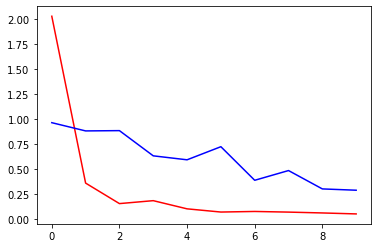

In [56]:
history.history
plt.plot(range(len(history.history['loss'])), history.history['loss'], color='red')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], color='blue')

plt.show()